In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/payment_data.csv')
data

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016
...,...,...,...,...,...,...,...,...,...,...,...,...
8245,58995478,0,0,0,0,9,15,NaN,NaN,0.0,NaN,NaN
8246,54992408,0,0,0,0,1,2,NaN,NaN,0.0,NaN,NaN
8247,54988209,0,0,0,0,5,13,NaN,NaN,20654.4,33315.0,NaN
8248,54992408,0,0,0,0,1,2,NaN,NaN,0.0,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   prod_limit       2132 non-null   float64
 8   update_date      8224 non-null   object 
 9   new_balance      8250 non-null   float64
 10  highest_balance  7841 non-null   float64
 11  report_date      7136 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 773.6+ KB


In [ ]:
data.isnull().sum()

id                    0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit         6118
update_date          26
new_balance           0
highest_balance     409
report_date        1114
dtype: int64

In [ ]:
data['prod_limit'].describe()

count      2132.000000
mean      85789.702205
std       74345.828184
min           1.100000
25%       37400.000000
50%       68200.000000
75%      112200.000000
max      660000.000000
Name: prod_limit, dtype: float64

In [ ]:
data['prod_limit']=data['prod_limit'].interpolate(method ='linear', limit_direction ='forward')
data['prod_limit'].mean()

88652.03133333333

In [ ]:
data['prod_limit'].isnull().sum()

0

In [ ]:
data=data.drop(['report_date'],axis=1)
data

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance
0,58987402,0,0,0,0,1,10,16500.000000,04/12/2016,0.0,NaN
1,58995151,0,0,0,0,1,5,23466.666667,04/12/2016,588720.0,491100.0
2,58997200,0,0,0,0,2,5,30433.333333,04/12/2016,840000.0,700500.0
3,54988608,0,0,0,0,3,10,37400.000000,03/12/2016,8425.2,7520.0
4,54987763,0,0,0,0,2,10,62700.000000,03/12/2016,15147.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8245,58995478,0,0,0,0,9,15,13200.000000,NaN,0.0,NaN
8246,54992408,0,0,0,0,1,2,13200.000000,NaN,0.0,NaN
8247,54988209,0,0,0,0,5,13,13200.000000,NaN,20654.4,33315.0
8248,54992408,0,0,0,0,1,2,13200.000000,NaN,0.0,NaN


In [ ]:
data['update_date']=pd.DatetimeIndex(data['update_date'])

<ipython-input-75-e4dda4576d71>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['update_date']=pd.DatetimeIndex(data['update_date'])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               8250 non-null   int64         
 1   OVD_t1           8250 non-null   int64         
 2   OVD_t2           8250 non-null   int64         
 3   OVD_t3           8250 non-null   int64         
 4   OVD_sum          8250 non-null   int64         
 5   pay_normal       8250 non-null   int64         
 6   prod_code        8250 non-null   int64         
 7   prod_limit       8250 non-null   float64       
 8   update_date      8224 non-null   datetime64[ns]
 9   new_balance      8250 non-null   float64       
 10  highest_balance  7841 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 709.1 KB


In [ ]:
data['month']=data['update_date'].dt.month
data['year']=data['update_date'].dt.year
data['days']=data['update_date'].dt.day
data.drop(['update_date'],inplace=True,axis=True)

In [ ]:
data.head()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance,month,year,days
0,58987402,0,0,0,0,1,10,16500.000000,0.0,NaN,4.0,2016.0,12.0
1,58995151,0,0,0,0,1,5,23466.666667,588720.0,491100.0,4.0,2016.0,12.0
2,58997200,0,0,0,0,2,5,30433.333333,840000.0,700500.0,4.0,2016.0,12.0
3,54988608,0,0,0,0,3,10,37400.000000,8425.2,7520.0,3.0,2016.0,12.0
4,54987763,0,0,0,0,2,10,62700.000000,15147.6,NaN,3.0,2016.0,12.0


In [ ]:
data[data['month'].isna()==True]=data['month'].mean()
data[data['year'].isna()==True]=data['year'].mean()
data[data['days'].isna()==True]=data['days'].mean()

In [ ]:
im=SimpleImputer(missing_values=np.nan,strategy='mean')
data['highest_balance']=im.fit_transform(data[['highest_balance']])

In [ ]:
data.isnull().sum()

id                 0
OVD_t1             0
OVD_t2             0
OVD_t3             0
OVD_sum            0
pay_normal         0
prod_code          0
prod_limit         0
new_balance        0
highest_balance    0
month              0
year               0
days               0
dtype: int64

In [ ]:
data1=pd.read_csv('/content/drive/MyDrive/customer_data.csv')
data1

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,58987926,5,NaN,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [ ]:
data1.isnull().sum()

label       0
id          0
fea_1       0
fea_2     149
fea_3       0
fea_4       0
fea_5       0
fea_6       0
fea_7       0
fea_8       0
fea_9       0
fea_10      0
fea_11      0
dtype: int64

In [ ]:
data1['fea_2']=data1.fea_2.fillna(data1['fea_2'].mean())
data1['fea_2']

0       1245.500000
1       1277.000000
2       1298.000000
3       1335.500000
4       1283.911373
           ...     
1120    1289.000000
1121    1283.911373
1122    1220.000000
1123    1250.000000
1124    1415.000000
Name: fea_2, Length: 1125, dtype: float64

In [ ]:
data1['fea_2'].mean()

1283.9113729508197

In [ ]:
data1.isnull().sum()

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

In [ ]:
final=pd.concat([data,data1],axis=1)
final

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance,month,year,days,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,5.898740e+07,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,16500.000000,0.000000,218414.471005,4.000000,2016.000000,12.000000,1.0,54982665.0,5.0,1245.500000,3.0,77000.0,2.0,15.0,5.0,109.0,5.0,151300.0,244.948974
1,5.899515e+07,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,23466.666667,588720.000000,491100.000000,4.000000,2016.000000,12.000000,0.0,59004779.0,4.0,1277.000000,1.0,113000.0,2.0,8.0,-1.0,100.0,3.0,341759.0,207.173840
2,5.899720e+07,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,30433.333333,840000.000000,700500.000000,4.000000,2016.000000,12.000000,0.0,58990862.0,7.0,1298.000000,1.0,110000.0,2.0,11.0,-1.0,101.0,5.0,72001.0,1.000000
3,5.498861e+07,0.000000,0.000000,0.000000,0.000000,3.000000,10.000000,37400.000000,8425.200000,7520.000000,3.000000,2016.000000,12.000000,1.0,58995168.0,7.0,1335.500000,1.0,151000.0,2.0,11.0,5.0,110.0,3.0,60084.0,1.000000
4,5.498776e+07,0.000000,0.000000,0.000000,0.000000,2.000000,10.000000,62700.000000,15147.600000,218414.471005,3.000000,2016.000000,12.000000,0.0,54987320.0,7.0,1283.911373,2.0,59000.0,2.0,11.0,5.0,108.0,4.0,450081.0,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8245,6.490029e+00,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8246,6.490029e+00,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8247,6.490029e+00,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8248,6.490029e+00,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,6.490029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
final.isnull().sum()

id                    0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit            0
new_balance           0
highest_balance       0
month                 0
year                  0
days                  0
label              7125
id                 7125
fea_1              7125
fea_2              7125
fea_3              7125
fea_4              7125
fea_5              7125
fea_6              7125
fea_7              7125
fea_8              7125
fea_9              7125
fea_10             7125
fea_11             7125
dtype: int64

In [ ]:
def imp(i=""):
  im=SimpleImputer(missing_values=np.nan,strategy='mean')
  return im.fit_transform(final[[i]])

In [ ]:
for i in final.columns:
  final[i]=imp(i)

In [ ]:
final['label']=final['label'].astype('int64')

In [ ]:
final.isnull().sum()

id                 0
OVD_t1             0
OVD_t2             0
OVD_t3             0
OVD_sum            0
pay_normal         0
prod_code          0
prod_limit         0
new_balance        0
highest_balance    0
month              0
year               0
days               0
label              0
id                 0
fea_1              0
fea_2              0
fea_3              0
fea_4              0
fea_5              0
fea_6              0
fea_7              0
fea_8              0
fea_9              0
fea_10             0
fea_11             0
dtype: int64

In [ ]:
final1=final.drop(['OVD_t1','OVD_t2','OVD_t3','OVD_sum','prod_code','prod_limit','month','days','fea_5','fea_6','fea_7','fea_8','fea_9','fea_10','fea_11'],axis=1)
final1

,id,pay_normal,new_balance,highest_balance,year,label,id,fea_1,fea_2,fea_3,fea_4
0,5.898740e+07,1.000000,0.000000,218414.471005,2016.000000,1,5.498266e+07,5.000000,1245.500000,3.000000,77000.000000
1,5.899515e+07,1.000000,588720.000000,491100.000000,2016.000000,0,5.900478e+07,4.000000,1277.000000,1.000000,113000.000000
2,5.899720e+07,2.000000,840000.000000,700500.000000,2016.000000,0,5.899086e+07,7.000000,1298.000000,1.000000,110000.000000
3,5.498861e+07,3.000000,8425.200000,7520.000000,2016.000000,1,5.899517e+07,7.000000,1335.500000,1.000000,151000.000000
4,5.498776e+07,2.000000,15147.600000,218414.471005,2016.000000,0,5.498732e+07,7.000000,1283.911373,2.000000,59000.000000
...,...,...,...,...,...,...,...,...,...,...,...
8245,6.490029e+00,6.490029,6.490029,6.490029,6.490029,0,5.783677e+07,5.482667,1283.911373,2.333333,120883.555556
8246,6.490029e+00,6.490029,6.490029,6.490029,6.490029,0,5.783677e+07,5.482667,1283.911373,2.333333,120883.555556
8247,6.490029e+00,6.490029,6.490029,6.490029,6.490029,0,5.783677e+07,5.482667,1283.911373,2.333333,120883.555556
8248,6.490029e+00,6.490029,6.490029,6.490029,6.490029,0,5.783677e+07,5.482667,1283.911373,2.333333,120883.555556


In [ ]:
final1.isnull().sum()

id                 0
pay_normal         0
new_balance        0
highest_balance    0
year               0
label              0
id                 0
fea_1              0
fea_2              0
fea_3              0
fea_4              0
dtype: int64

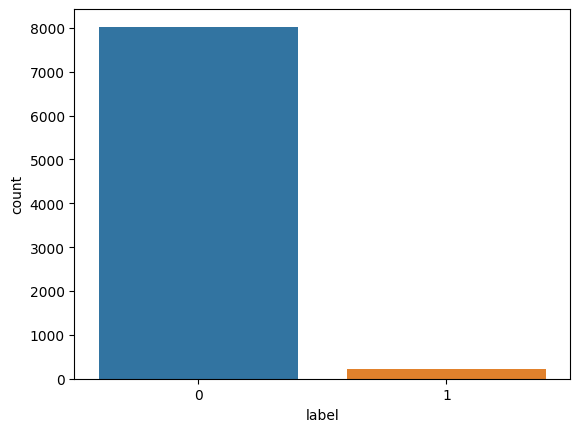

In [ ]:
sns.countplot(data=final1,x=final1['label'])
plt.show()

<Axes: xlabel='fea_1', ylabel='pay_normal'>

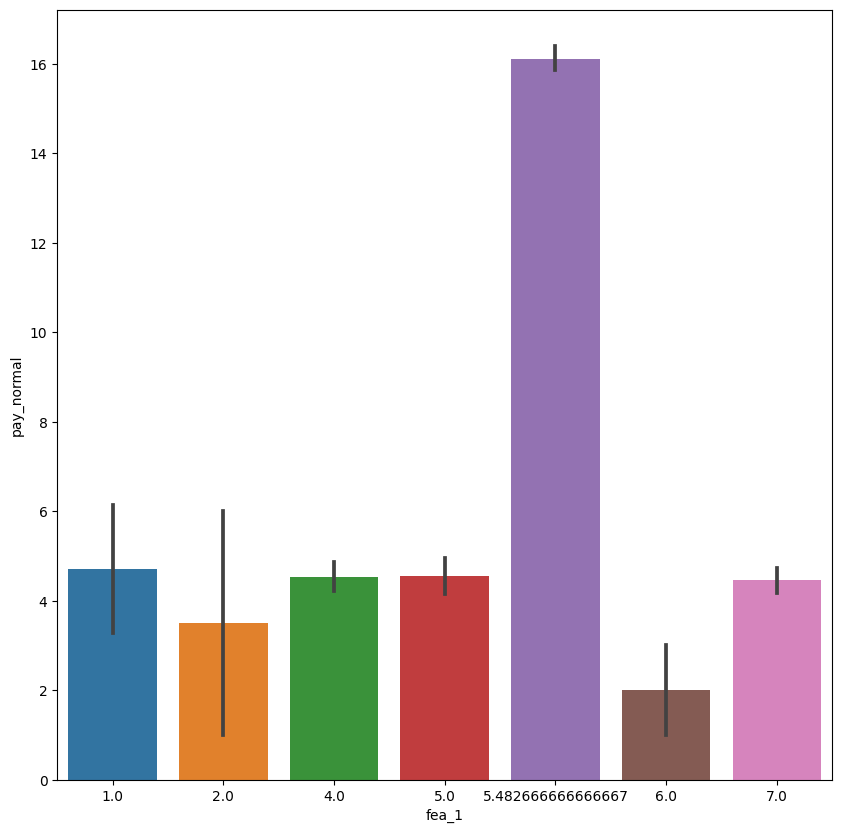

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=final1,x='fea_1',y='pay_normal')

In [ ]:
x=final1.drop(['label'],axis=1)
x

,id,pay_normal,new_balance,highest_balance,year,id,fea_1,fea_2,fea_3,fea_4
0,5.898740e+07,1.000000,0.000000,218414.471005,2016.000000,5.498266e+07,5.000000,1245.500000,3.000000,77000.000000
1,5.899515e+07,1.000000,588720.000000,491100.000000,2016.000000,5.900478e+07,4.000000,1277.000000,1.000000,113000.000000
2,5.899720e+07,2.000000,840000.000000,700500.000000,2016.000000,5.899086e+07,7.000000,1298.000000,1.000000,110000.000000
3,5.498861e+07,3.000000,8425.200000,7520.000000,2016.000000,5.899517e+07,7.000000,1335.500000,1.000000,151000.000000
4,5.498776e+07,2.000000,15147.600000,218414.471005,2016.000000,5.498732e+07,7.000000,1283.911373,2.000000,59000.000000
...,...,...,...,...,...,...,...,...,...,...
8245,6.490029e+00,6.490029,6.490029,6.490029,6.490029,5.783677e+07,5.482667,1283.911373,2.333333,120883.555556
8246,6.490029e+00,6.490029,6.490029,6.490029,6.490029,5.783677e+07,5.482667,1283.911373,2.333333,120883.555556
8247,6.490029e+00,6.490029,6.490029,6.490029,6.490029,5.783677e+07,5.482667,1283.911373,2.333333,120883.555556
8248,6.490029e+00,6.490029,6.490029,6.490029,6.490029,5.783677e+07,5.482667,1283.911373,2.333333,120883.555556


In [ ]:
y=final1['label']
y

0       1
1       0
2       0
3       1
4       0
       ..
8245    0
8246    0
8247    0
8248    0
8249    0
Name: label, Length: 8250, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [ ]:
log= LogisticRegression(random_state=0)
log.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred= log.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9723703344643723

In [ ]:
log.score(x_train,y_train)

0.9726846613867788

<Axes: >

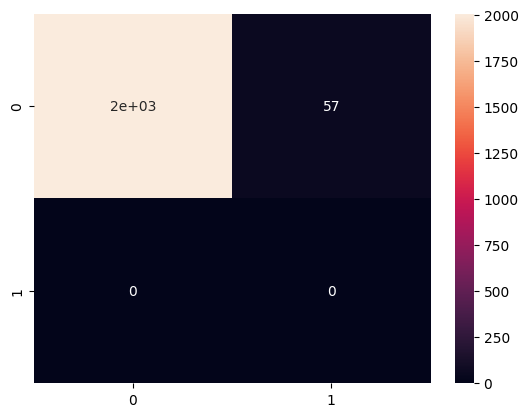

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(x_train, y_train)
y_pred1 = tree.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred1)

0.9583131362094037

<Axes: >

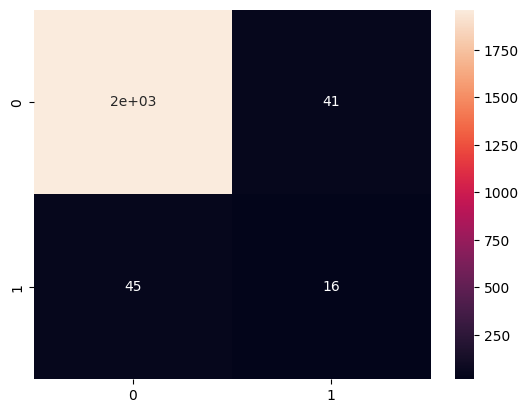

In [ ]:
cm1=confusion_matrix(y_pred1,y_test)
sns.heatmap(cm1,annot=True)

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)
y_pred2 = clf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.9723703344643723

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred3=classifier.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.9670382937469705

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier1 = GaussianNB()
classifier1.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred4=classifier.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred4)

0.9670382937469705

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_params={
    'LogisticRegression':{
        'model':LogisticRegression(),
        'params':{}
    },
    'decisiontree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':["gini", "entropy", "log_loss"],
            'splitter':["best", "random"]
        }
    },
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[100,200,300],
            'criterion':["gini", "entropy", "log_loss"]
            }
        }
    }

In [ ]:
s=[]
for mp,model_parms in model_params.items():
    clf1=GridSearchCV(model_parms['model'],model_parms['params'],cv=5)
    clf1.fit(x_train,y_train)
    s.append({'params':clf1.best_params_,'model':mp,'score':clf1.best_score_})

In [ ]:
df=pd.DataFrame(s)

In [ ]:
df['score']

0    0.972362
1    0.959431
2    0.972200
Name: score, dtype: float64

In [ ]:
x_test['predicted']=list(y_pred2)

In [ ]:
x_test['true']=list(y_test)

In [ ]:
final_csv=x_test.to_csv('final_csv.csv')

In [ ]:
x_test

,id,pay_normal,new_balance,highest_balance,year,id,fea_1,fea_2,fea_3,fea_4,predicted,true
8240,6.490029e+00,6.490029,6.490029,6.490029,6.490029,5.783677e+07,5.482667,1283.911373,2.333333,120883.555556,0,0
4831,5.898387e+07,36.000000,3830.400000,27584.000000,2012.000000,5.783677e+07,5.482667,1283.911373,2.333333,120883.555556,0,0
1817,5.900034e+07,11.000000,18315.600000,50495.000000,2015.000000,5.783677e+07,5.482667,1283.911373,2.333333,120883.555556,0,0
7165,5.898258e+07,17.000000,0.000000,218414.471005,2007.000000,5.783677e+07,5.482667,1283.911373,2.333333,120883.555556,0,0
5660,5.898630e+07,13.000000,0.000000,100500.000000,2010.000000,5.783677e+07,5.482667,1283.911373,2.333333,120883.555556,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8127,5.898258e+07,1.000000,0.000000,2163.000000,2001.000000,5.783677e+07,5.482667,1283.911373,2.333333,120883.555556,0,0
3757,5.899000e+07,12.000000,945799.200000,800500.000000,2013.000000,5.783677e+07,5.482667,1283.911373,2.333333,120883.555556,0,0
4424,5.898893e+07,24.000000,56.400000,30500.000000,2013.000000,5.783677e+07,5.482667,1283.911373,2.333333,120883.555556,0,0
8007,5.899894e+07,1.000000,0.000000,33462.000000,2004.000000,5.783677e+07,5.482667,1283.911373,2.333333,120883.555556,0,0
